<h1 style="font-size: 50px;">PanIC Room</h1>
<h2 style="font-size: 30px;">Lecture 2 - Data and Optimisation</h2>
<h2 style="font-size: 25px;">Dr A. Freddie Page and Dr Sam Cooper</h2>
<h3 style="font-size: 20px;">10th April 2018</h3>
<img src="de.stripes.png" alt="background" style="position: absolute; top: 0px; right: 0px;">
<div style="height: 600px;">&nbsp;</div>

In [1]:
%run OptModule.ipynb

Let's take a sample of people and measure their height.

<IPython.core.display.Javascript object>


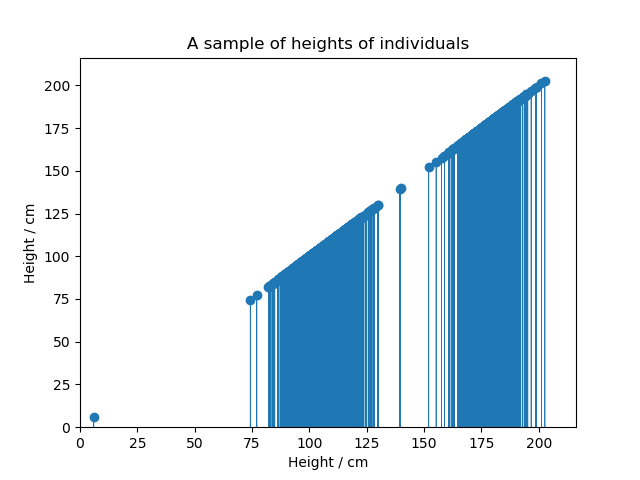

In [19]:
rawdata = takeSample(1000)
plotSample(rawdata)

It's probably more informative if we do some processing on this raw data, such as displaying it as a histogram.

<IPython.core.display.Javascript object>


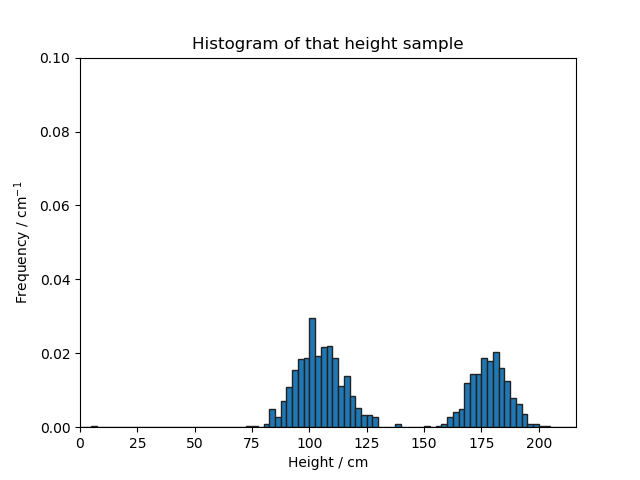

In [20]:
histogram = np.histogram(rawdata, np.arange(0,500,2.5), density=True)
plotHist(histogram);

This histogram data can be represented as a vector, i.e. a list of numbers.

In [8]:
histogram[0][55:90]

array([ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.0012,  0.002 ,  0.006 ,  0.01  ,  0.014 ,  0.0204,  0.0336,
        0.0392,  0.0552,  0.0416,  0.0464,  0.0408,  0.0348,  0.0236,
        0.0136,  0.0088,  0.0048,  0.0024,  0.0008,  0.0008,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ])

Let's model the data with a *normal distribution*.

<IPython.core.display.Javascript object>


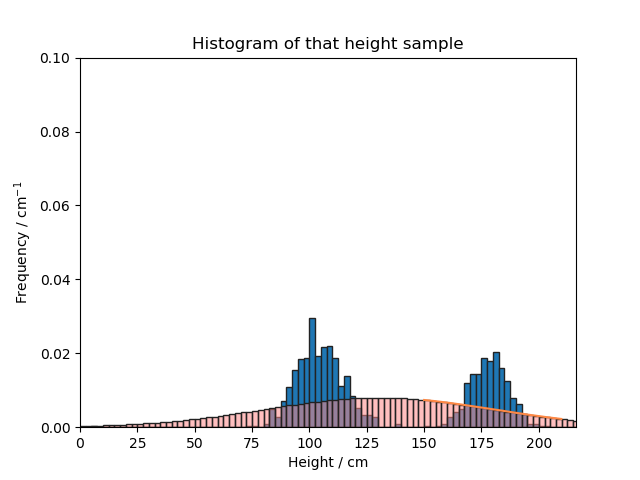

In [23]:
guess_μ = 130
guess_σ = 50
plotHistNormal(histogram, guess_μ, guess_σ)

This has two parameters, $\mu$ and $\sigma$, which we can independantly vary.
We can also write this as a vector, $\begin{bmatrix} \mu \\ \sigma \end{bmatrix}$, with just two parameters.

The choice of parameter will determine how well the model performs. i.e. with the sum of squared residuals.

The initial model had a particular performance:

In [13]:
binCentres = (histogram[1][:-1] + histogram[1][1:]) / 2
r = histogram[0] - normal(165, 5, binCentres)
r @ r

0.024859017739502998

But we can do better by choosing better values.

In [14]:
r = histogram[0] - normal(guess_μ, guess_σ, binCentres)
r @ r

0.00032219912635406264

How do we know we have the best combination?

<IPython.core.display.Javascript object>


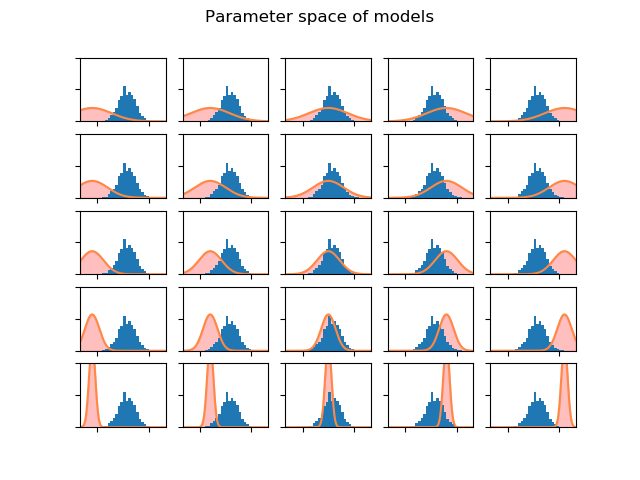

In [15]:
plotParameterSpace(histogram)

Each of the (25) plots above represents a single point in the 2d parameter space.
Let's go higher resolution.

<IPython.core.display.Javascript object>


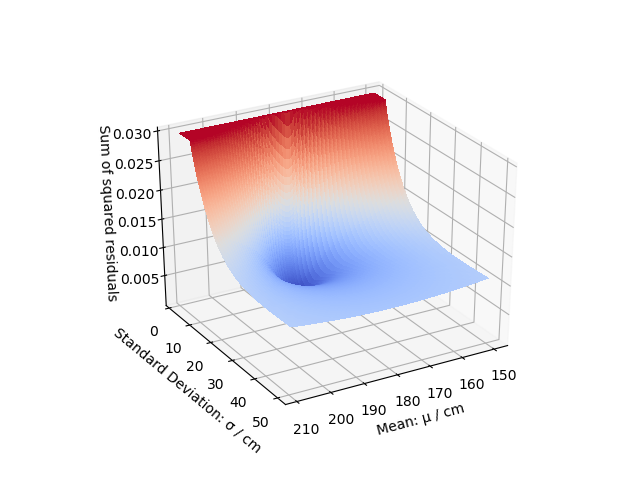

In [17]:
drawSurface(histogram)

This gives us a view of the parameter space, but it may be more instructive to plot as a contour map.

<IPython.core.display.Javascript object>


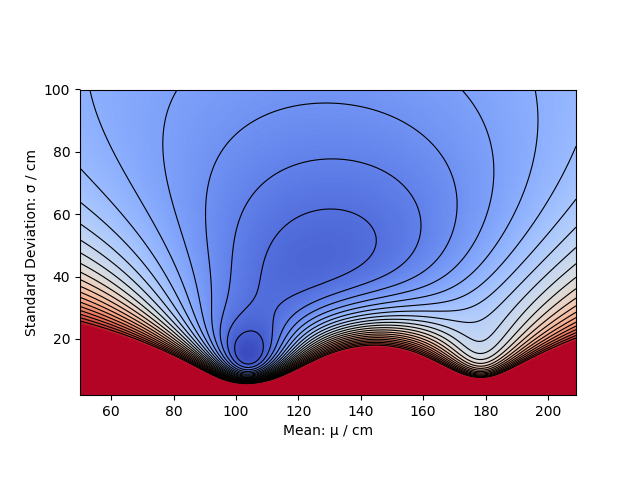

In [21]:
drawContour(histogram)

Here it's fairly easy to see where the deepest point is. But we've asked for the height at every single point in the space. This can be expensive. The goal would be to do find the minimum by evaluating the function the least number of times.